In [1]:
import firm
import stationary_dist
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
mu=0
N=9
rho=0.7605
sigma_eps=0.213
alpha_k=0.297
alpha_l=0.650
delta=0.154
psi=1.080
r=0.040
w=0.7
h=6.616

In [3]:
z,pi=firm.z_pi(mu=0,N=9,rho=0.7605,sigma_eps=0.213)


In [4]:
F,e=firm.firm_sol(alpha_k=alpha_k,alpha_l=alpha_l,delta=delta,psi=psi,r=r,w=w,z=z,pi=pi)

In [5]:
Gamma=stationary_dist.dist(Pi=F['pi'],PF=F['PF'],z=z)

Stationary distribution converged after this many iterations:  78


In [6]:
zmat=np.matrix(z)


In [7]:
def market_clear(w, *params):
    alpha_k,alpha_l,delta,psi,r,h= params
    PF=np.matrix(F['PF'])
    kvec=np.matrix(F['kvec'])
    
    l_d=np.power((np.multiply(np.divide(alpha_l/w),np.dot(np.transpose(zmat),np.power(kvec,alpha_k)))),(1/(1-alpha_l)))
    L_d=np.dot(np.transpose(l_d),Gamma)
    small_i=np.zeros([zmat.shape[1],PF.shape[1]])
    small_y=np.zeros([zmat.shape[1],PF.shape[1]])

    for i in range(zmat.shape[1]):
        for j in range(PF.shape[1]):
            small_i[i,j]=F['kvec'][PF[i,j]]-(1-delta)*F['kvec'][j]
    I=np.dot(np.transpose(small_i),Gamma)
    small_psi=psi/2*np.power(np.divide(small_i,kvec),2)
    big_psi=np.dot(np.transpose(small_psi),Gamma)
    for i in range(zmat.shape[1]):
        for j in range(PF.shape[1]):
            small_y[i,j]=zmat[0,i]*np.power(kvec,alpha_k)[0,j]*np.power(l_d,alpha_l)[i,j]
    Y=np.dot(np.transpose(small_y),Gamma)
    C=np.matrix(Y-big_psi-I)
    L_s=np.divide(w/h,C)
    f=L_s-L_d
    return f
    

In [8]:
params=alpha_k,alpha_l,delta,psi,r,h
print(scipy.optimize.root(market_clear,w1,args=params))


ValueError: operands could not be broadcast together with shapes (81225,) (9,285) 

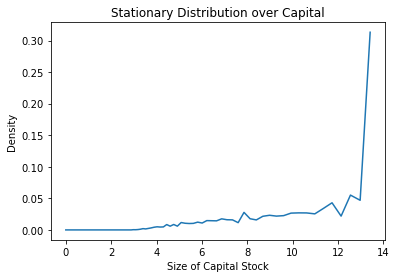

In [38]:
%matplotlib inline

# Plot the stationary distribution over k
fig, ax = plt.subplots()
ax.plot(F['kvec'], Gamma.sum(axis=0))
plt.xlabel('Size of Capital Stock')
plt.ylabel('Density')
plt.title('Stationary Distribution over Capital')
plt.savefig('Stationary_Distribution_over_Capital.png')

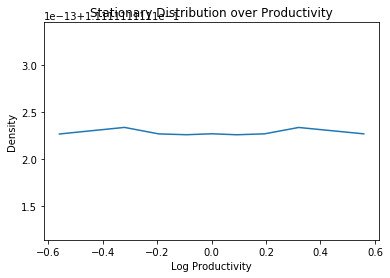

In [37]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(np.log(z), Gamma.sum(axis=1))
plt.xlabel('Log Productivity')
plt.ylabel('Density')
plt.title('Stationary Distribution over Productivity')
plt.savefig('Stationary_Distribution_over_Productivity.png')

In [12]:
PF=F['PF']
k_prime=np.zeros([zmat.shape[1],PF.shape[1]])
for i in range(zmat.shape[1]):
        for j in range(PF.shape[1]):
            k_prime[i,j]=F['kvec'][PF[i,j]]

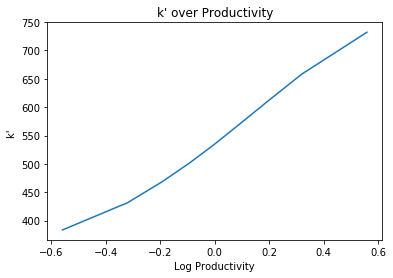

In [36]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(np.log(z), k_prime.sum(axis=1))
plt.xlabel('Log Productivity')
plt.ylabel('k\' ')
plt.title('k\' over Productivity')
plt.savefig('k_prime_over_Productivity.png')